<center>
<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/1/1d/Logo_T%C3%A9l%C3%A9com_SudParis.svg/1014px-Logo_T%C3%A9l%C3%A9com_SudParis.svg.png" width="10%" />
</center>

<center> <h2> NET 4103/7431 Complex Network </h2> </center>

<center> <h3> Vincent Gauthier (vincent.gauthier@telecom-sudparis.eu) </h3> </center>

### Note
Avant de commencer les exercices, assurez-vous que tout fonctionne comme prévu. Tout d'abord, le redémarrage du kernel **(dans la barre de menus, sélectionnez le kernel $\rightarrow$ Restart)**.

Assurez-vous que vous remplir les célluler aux endroits marquer «YOUR CODE HERE». 

Veuillez supprimer les ligne «raise NotImplementedError()» dans toutes les cellules auxquelles vous avez répondu, ainsi que votre nom et prénom ci-dessous:

In [66]:
NOM = 'LIU'
PRENOM = 'Peizhe'

<h1 align="center">Lab #2: PageRank</h1> 
<br />
<br />
<br />
<img src="../../images/network.png" style="display:block;margin-left:auto;margin-right:auto;width:80%;"></img>

# Anglais
## Introduction

Before 1998, the web graph was a largely unused source of information and ignored by search engines such as Yahoo, or Astalavista. However, researchers such as Jon Kleinberg [2] and Brin and Page [3] have used this resource to create an algorithmically elegant methodology that has helped develop the search engines we know today. They then mainly used the following idea: a hyperlink link from my web page to another page can be interpreted as a recommendation from me to the web page in question. The underlying idea that is exploited is the following: a web page that is quoted very often must have a better ranking than a less frequently cited web page. However, this idea is not new, but used as the sole selective criterion is not enough. For example, a letter of recommendation for a job from the CEO of Orange will surely carry more weight than the other 10 letters of recommendation that you could have received from random people. In conclusion, the importance of the recommendations (and not only their numbers) must also be taken into account in calculating the reputation of a web page. This is exactly the principle of **PageRank**.

In current search engines, each indexed webpage is associated with a "**PageRank**" value. When you perform a search, the search engine returns the web pages corresponding to the keywords sorted in ascending order of their value of "PageRank". The underlying assumption that is used is that: the web page with the highest "PageRank" value must be the most relevant for the keywords considered.

In short, the notoriety (PageRank value) of a web page is defined as follows: the reputation of a web page is important, if it is itself pointed by other web pages with significant notoriety. This circular reasoning is at the heart of the algorithm that will be developed during this exercise. Through this circular reasoning, we deduce that the values of PageRank are in fact the values of the stationary states of an immense Markov chain. The transitions of this Markov chain are defined by the web graph. The matrix of transitions of this Markov chain is called "Google" matrix $\mathbf{G}$. In order to calculate this stationary state vector, however, the Markov chain in question must have a unique solution. For this, one of the conditions is that the transitions graph must be irreducible (ie the graph forms a connected component), which is not the case for the web graph (cf. Fig. 1). The PageRank algorithm allowed Brin and Page to intelligently bypass this difficulty applying a transformation on the adjacency matrix in order to assume the irreducibility of this one.

<div align="center">
<img src="../../images/Scc.png" width="500px"></img>
<div align="center"><b>Fig. 1</b></div>
</div>

**PageRank's Algorithm**
1. Normalization of the adjacency matrix of the web graph to generate a stochastic matrix
2. we update the matrix from the previous step in order to take into account the Dangling nodes (the node that don't have any outgoing link)
3. Create the "Google" Matrix
4. Compute the stationary state of the Markov chain

In the first part of this exiercice we are going to considere the follwing directed graph $\mathcal{G}(\mathcal{V}, \mathcal{E})$ (cf. **Fig. 2**), as small example of the web graph. Each edge $e \in \mathcal{E}$ represente one hyperlink from one webpage $v \in \mathcal{V}$ to another.

<div align="center">
<img src="../../images/GraphPageRank.png" width="400px"></img>
<div align="center"><b>Fig. 2</b></div>
</div>

### Notations
$\mathbf{A}$: The adjacency matrix of the graph $\mathcal{G}(\mathcal{V}, \mathcal{E})$

$\mathbf{H}$: Normalized adjacency matrix

$\mathbf{G}$: The dense, stochastic matrix called teh "Google" matrix

$\mathbf{\pi}^T$: PageRank Vector, a stationnay vector of the Markov chain describe by the matrix $\mathbf{G}$

$n$ : Number of the web page (in our graph)

$\alpha$: parameter between 0 and 1

### Conventions

$\mathbf{e}^T$ : is vector line $\begin{pmatrix} 1 & 1 & 1 & 1 \end{pmatrix}$

$\mathbf{e}$ : is a vector colomn  $\begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}$

$\sigma(\mathbf{A})$ est l'ensemble (set) des valeurs propres de la matrice $\mathbf{A}$

$\lambda_{max} = \max_{\lambda \in \sigma(\mathbf{A})} \lvert \lambda \lvert$ est la plus grande valeur propre de la matrice $\mathbf{A}$

$\mathbf{e} \otimes \mathbf{e}^T$ : est le produit exterieur $\begin{pmatrix} 1 \\ 2 \\ 3  \end{pmatrix}  \otimes \begin{pmatrix} 1 & 2 & 3 \end{pmatrix} = \begin{pmatrix} 1 & 2 & 3  \\ 2 & 4 & 6 \\ 3 & 6 & 9 \end{pmatrix}$

### Python Reminder 
Multiplication and division with Numpy:
```Python
import numpy as np
x = np.array([2, 2, 2])
2*x
>>> array([4, 4, 4])
x = np.array([2, 2, 2])
x/2
>>> array([1, 1, 1])
A = np.array([[2, 2, 2], [2, 2, 2], [2, 2, 2]])
A/2
>>> np.array([[1, 1, 1], 
              [1, 1, 1], 
              [1, 1, 1]])
```

Matrix vector division:
```Python
A = np.array([[1, 1], [4, 4]])
b = np.array([1, 3])
(A.T/b).T
>>> array([[ 1.        ,  1.        ],
           [ 1.33333333,  1.33333333]])
```

Dot product:
```Python
import numpy as np

A = np.array([[2, 2, 2], [2, 2, 2]])
x = np.array([2, 2, 2])
np.dot(A,x)
>>> array([12, 12])

a = np.array([1, 1, 1])
b = np.array([1, 1, 1])
np.outer(a,b)
>>> array([[1, 1, 1], 
           [1, 1, 1], 
           [1, 1, 1]])
```

Matrix transpose:
```Python
import numpy as np

A = np.array([[1, 2], [3, 4]])
A.T
>>> array([[1, 3],
           [2, 4]])
```

Shape of a matrix
```Python
A = np.array([[1, 1, 1], [1, 1, 1]])
n, m = A.shape
print(n, m)
>>> 2 3
```

Sum of each row entries of a matrix
```Python
A = np.array([[1, 1, 1,], [2, 2, 2]])
A[1,:].sum()
>>> 6
```

# Français
## Introduction 

Avant 1998, le graphe du web était une source d'information largement inutilisée et ignorée par les moteurs de recherche tels que Yahoo, ou Astalavista. Cependant, des chercheurs tels que Jon Kleinberg [2] et Brin et Page [3] ont utilisé cette ressource afin de créer une méthodologie algorithmiquement élégante qui a permis de développer les moteurs de recherche que l'on connait aujourd'hui. Ils ont alors principalement utilisé l'idée suivante: un lien hyperlink de ma page web vers une autre page peut être interprété comme une recommandation de ma part vers la page web en question. L’idée sous-jacente qui est exploitée est la suivante: une page web qui est citée très souvent doit être une page web plus importante que page web moins souvent citée. Cependant, cette idée n'est pas nouvelle, utiliser la bibliometrie (le nombre de citations) comme unique critère sélectif n’est pas suffisant. Par exemple, une lettre de recommandation pour un travail provenant du PDG d’orange aura surement plus de poids que les 10 autres lettres  de recommandation que vous auriez pu avoir. En conclusion, l’importance des recommandations (et non pas seulement leurs nombres) doit aussi être prise en compte dans le calcul de la notoriété d’une page web. C’est exactement le principe du **PageRank**.

Dans les moteurs de recherche actuels, on associe à chaque page web indexée une valeur de "PageRank". Lorsque vous effectuez une recherche, le moteur de recherche vous retourne les pages web correspondant aux mots clés triés par ordre croissant de leur valeur de "PageRank". L’hypothèse sous-jacente qui est utilisée est que: la page web qui possède la valeur de "PageRank" la plus élevée doit être la plus pertinente pour les mots clés considérés. 

Afin de faire court, la notoriété (valeur du PageRank) d'une page web est définie comme suit: la notoriété d’une page web est importante, si elle est elle-même pointée par d’autres pages web avec une notoriété importante. Ce raisonnement circulaire est au coeur de l'algorithme qui va être développé durant cet exercice. Au travers de ce raisonnement circulaire, on en déduit que les valeurs de PageRank  sont en fait les valeurs des états stationnaires d'une immense chaîne de Markov. Les transitions de cette chaîne de Markov sont définies par le graphe du web. La matrice des transitions de cette chaîne de Markov est appelée "Google" matrice $\mathbf{G}$. Afin de calculer ce vecteur d'états stationnaires, il faut cependant que la chaîne de Markov en question admette une solution unique. Pour cela, une des conditions est: qu’il faut que le graphe des transitions soit irréductible (c.-à-d. que le graphe forme une composante connexe) ce qui n'est pas le cas du graphe du web (cf. Fig. 1). L'algorithme du PageRank a permis a Brin et Page de contourner intelligemment cette difficulter appliquant une transformation sur la matrice d’adjacence afin de s’assumer de l’irréductibilité de celle-ci.

<div align="center">
<img src="../../images/Scc.png" width="500px"></img>
<b>Figure 1</b>
</div>

**Algorithme du PageRank**
1. Normalisation de la matrice d'adjacence du graphe du web
2. Découverte des noeuds du graphe du web ne possédant pas de lien de sortie (aucun lien hypertext)
3. Création de la "Google" Matrice 
4. Calcul de la valeur des états stationnaires de la chaîne de Markov  

Dans la première partie de cet exercice nous allons considérer le graphe orienté suivant $\mathcal{G}(\mathcal{V}, \mathcal{E})$ (cf. **Fig. 2**), comme un petit exemple du graphe du web. Chaque arc $e \in \mathcal{E}$ représente un lien hyperlink d'une page web $v \in \mathcal{V}$ (un noeud du graphe ) vers une autre.

<div align="center">
<img src="../../images/GraphPageRank.png" width="400px"></img>
<b>Figure 2</b>
</div>

### Notations
$\mathbf{A}$: Matrice d'ajacence du graphe $\mathcal{G}(\mathcal{V}, \mathcal{E})$

$\mathbf{H}$: Matrice d'adjacence normalisée

$\mathbf{G}$: Matrice dense, stochastique et complete appelée Google matrice 

$\mathbf{\pi}^T$: Vecteur ligne, stationnaire, appelé vecteur PageRank  

$n$ : nombre de pages web dans le moteur de recherche

$\alpha$: paramétre entre 0 et 1

### Conventions

$\mathbf{e}^T$ : est une vecteur ligne $\begin{pmatrix} 1 & 1 & 1 & 1 \end{pmatrix}$

$\mathbf{e}$ : est un vecteur colonne  $\begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}$

$\sigma(\mathbf{A})$ est l'ensemble (set) des valeurs propres de la matrice $\mathbf{A}$

$\lambda_{max} = \max_{\lambda \in \sigma(\mathbf{A})} \lvert \lambda \lvert$ est la plus grande valeur propre de la matrice $\mathbf{A}$

$\mathbf{e} \otimes \mathbf{e}^T$ : est le produit exterieur $\begin{pmatrix} 1 \\ 2 \\ 3  \end{pmatrix}  \otimes \begin{pmatrix} 1 & 2 & 3 \end{pmatrix} = \begin{pmatrix} 1 & 2 & 3  \\ 2 & 4 & 6 \\ 3 & 6 & 9 \end{pmatrix}$

### Rapels d'algébre vectoriel en python 
Multiplication et division terme à terme:
```Python
import numpy as np
x = np.array([2, 2, 2])
2*x
>>> array([4, 4, 4])
x = np.array([2, 2, 2])
x/2
>>> array([1, 1, 1])
A = np.array([[2, 2, 2], [2, 2, 2], [2, 2, 2]])
A/2
>>> np.array([[1, 1, 1], 
              [1, 1, 1], 
              [1, 1, 1]])
```

Division d'une matrice par un vecteur 
```Python
A = np.array([[1, 1], [4, 4]])
b = np.array([1, 3])
(A.T/b).T
>>> array([[ 1.        ,  1.        ],
           [ 1.33333333,  1.33333333]])
```

Produit vectoriel:
```Python
import numpy as np

A = np.array([[2, 2, 2], [2, 2, 2]])
x = np.array([2, 2, 2])
np.dot(A,x)
>>> array([12, 12])

a = np.array([1, 1, 1])
b = np.array([1, 1, 1])
np.outer(a,b)
>>> array([[1, 1, 1], 
           [1, 1, 1], 
           [1, 1, 1]])
```

Transposé:
```Python
import numpy as np

A = np.array([[1, 2], [3, 4]])
A.T
>>> array([[1, 3],
           [2, 4]])
```

Dimention d'une matrice 
```Python
A = np.array([[1, 1, 1], [1, 1, 1]])
n, m = A.shape
print(n, m)
>>> 2 3
```

Somme d'une ligne d'une matrice
```Python
A = np.array([[1, 1, 1,], [2, 2, 2]])
A[1,:].sum()
>>> 6
```


In [2]:
import networkx as nx
import numpy as np
import scipy as sp
from numpy import linalg as LA
import pandas as pd
import csv
import matplotlib.pylab as plt

%matplotlib inline

# Style pour le Notebook
from IPython.core.display import HTML

def css_styling():
    styles = open("../../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [3]:
import networkx as nx
from packaging import version
import sys 
import scipy 
print("Python version:", sys.version)
print("networkx version:", nx.__version__)

# assert networkx version is greater or equal to 2.6
assert version.parse(nx.__version__) >= version.parse("3.0")

# assert python version is greater that 3.7
assert sys.version_info[0] == 3
assert sys.version_info[1] >= 7 

# If working in colab mount the drive filesystem 
if 'google.colab' in str(get_ipython()):
    print('Working in colab')
    
    from google.colab import drive
    drive.mount('/content/drive')
else:
    print("working locally")
    
    
print(scipy.__version__)

Python version: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]
networkx version: 3.4.2
working locally
1.15.1


# English
## Generate a synthetic web-graph with networkx

With the help of networkx generate the directed graph $\mathcal{G}(\mathcal{V}, \mathcal{E})$ (cf. **Fig 2**), and draw the graph with matplotlib in order to validate visualy that you obtain the same graph as in the **figure 2**. 

**Help**: Use the already defined functions in the networkx library to add vertices and edges to the graph ([networkx tutorial](https://networkx.github.io/documentation/networkx-1.10/tutorial/tutorial.html#nodes))

# Français
## Générer un graphe du web synthétique

A l'aide de Networkx, générer le graphe orienté $\mathcal{G}(\mathcal{V}, \mathcal{E})$ (cf. **Fig 2**), et dessiner le graphe à l'aide de matplotlib afin de valider visuellement s'il correspond bien à celui de la **figure 2**.

**Aide**: on utilisera les methodes definie dans networkx pour ajouter des noeuds et des arc au graphe ([tutoriel networkx](https://networkx.github.io/documentation/networkx-1.10/tutorial/tutorial.html#nodes))

(np.float64(-0.3932511100006046),
 np.float64(0.3965228817034357),
 np.float64(-0.9529569159047636),
 np.float64(1.1855750915565613))

<Figure size 640x480 with 0 Axes>

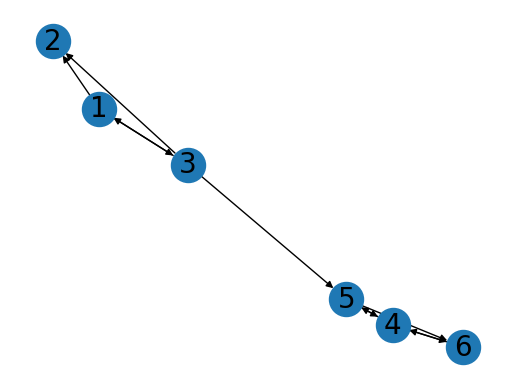

In [28]:
plt.figure()
g = nx.DiGraph()

# MY CODE HERE
g.add_nodes_from([1, 2, 3, 4, 5, 6])
g.add_edges_from([(1, 2), (1, 3),(3, 2),(3, 1),(3, 5), (4, 5), (4, 6), (5, 4), (5, 6),(6, 4)])  
plt.figure()

pos = nx.spring_layout(g)
nx.draw_networkx(g, pos=pos, node_size=600, font_size=20.0)
plt.axis('off')

In [29]:
assert len(g.nodes()) == 6
assert g.has_edge(6,4)
assert g.has_edge(4,6)
assert g.has_edge(2,5) == False

# English
## Extract the adjacency matrix of a graph 

Before going further in the exercise, let's extract the adjacency matrix $\mathbf{A}_{n \times n}$ from the directed graph $\mathcal{G}(\mathcal{V}, \mathcal{E})$ to construct the normalized adjacency matrix of the $\mathbf{H}_{n \times n} $ graph.

(eq. **1**)
$$
\mathbf{H}_{ij} = \begin{cases}
    1/\sum_{j} \mathbf{A}_{ij} & \text{ if there is a link between node } i \text{ and } j\\
    0 & \text{ otherwise}
\end{cases}
$$

**Exemple**: The matrix $\mathbf{H}_{n \times n}$ of the graph in figure 2.


$$
\mathbf{H} = \begin{pmatrix}
  0 & 1/2 & 1/2 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 & 0 & 0 \\
  1/3 & 1/3 & 0 & 0 & 1/3 & 0 \\
  0 & 0 & 0 & 0 & 1/2 & 1/2 \\
  0 & 0 & 0 & 1/2 & 0 & 1/2 \\
  0 & 0 & 0 & 1 & 0 & 0 \\
\end{pmatrix}
$$

**Example: How to export the adjacency matrix from a networkx graph**
```Python
>>> import numpy as np
>>> G = nx.Graph([(1,2), (2, 3)])
>>> node_order = [1, 2, 3]
>>> A = np.array(nx.adjacency_matrix(G, nodelist=node_order).todense())
>>> A
array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]])
```


# Français
## Extraire la matrice d'adjacence du graphe

Avant d'aller plus avant dans l'exercice, nous allons extraire la matrice d'adjacence $\mathbf{A}_{n\times n}$ du graphe dirigé $\mathcal{G}(\mathcal{V}, \mathcal{E})$.  Celui-ci vous nous permettre de construire la matrice normalisés d'adjacence du graphe $\mathbf{H}_{n\times n}$.

(eq. **1**)
$$
\mathbf{H}_{ij} = \begin{cases}
    1/\sum_{j} \mathbf{A}_{ij} & \text{ si il y a une lien entre le noeud } i \text{ et } j\\
    0 & \text{ sinon}
\end{cases}
$$

**Exemple**: La matrice $\mathbf{H}_{n \times n}$ correspondant au graphe defini dans la figure 1.


$$
\mathbf{H} = \begin{pmatrix}
  0 & 1/2 & 1/2 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 & 0 & 0 \\
  1/3 & 1/3 & 0 & 0 & 1/3 & 0 \\
  0 & 0 & 0 & 0 & 1/2 & 1/2 \\
  0 & 0 & 0 & 1/2 & 0 & 1/2 \\
  0 & 0 & 0 & 1 & 0 & 0 \\
\end{pmatrix}
$$

**Example de recupération de la matrice d'ajacence avec networkx**
```Python
>>> import numpy as np
>>> G = nx.Graph([(1,2), (2, 3)])
>>> node_order = [1, 2, 3]
>>> A = np.array(nx.adjacency_matrix(G, nodelist=node_order).todense())
>>> A
array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]])
```

In [36]:
def transform_to_stochatic(G):
    ### Ignore division by zero warmings
    np.seterr(divide='ignore', invalid='ignore')
    
    # MY CODE HERE
    node_order = list(G.nodes())
    adj_matrix = np.array(nx.adjacency_matrix(G, nodelist=node_order).todense())
    adj_matrix = adj_matrix.astype(float)
    # Normaliser chaque colonne pour obtenir une matrice stochastique
    n = adj_matrix.shape[0]  # Nombre de sommets
    for i in range(n): 
        row_sum = np.sum(adj_matrix[i, :])  
        if row_sum>0:
            adj_matrix[i,:] = adj_matrix[i,:] / row_sum 
    
    return adj_matrix
print(transform_to_stochatic(g))

[[0.         0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.5        0.         0.5       ]
 [0.         0.         0.         1.         0.         0.        ]]


In [37]:
H = transform_to_stochatic(g)

H_res = np.array( 
[[ 0.,          0.5,         0.5,         0.,          0.,          0.,        ],
 [ 0.,          0.,          0.,          0.,          0.,          0.,        ],
 [ 0.33333333,  0.33333333,  0.,          0.,          0.33333333,  0.,        ],
 [ 0.,          0.,          0.,          0.,          0.5,         0.5,       ],
 [ 0.,          0.,          0.,          0.5,         0.,          0.5,       ],
 [ 0.,          0.,          0.,          1.,          0.,          0.,        ]])

np.testing.assert_allclose(H, H_res, rtol=1e-4)
assert isinstance(H, np.ndarray)

# English
## Finding dangling nodes 

We want to calculate the "dangling vector" $\mathbf{a}$ which associates with each node the value 1 if this one does not have any outgoing link, and 0 otherwise.

(eq. **2**)

$$
\mathbf{a}_i = \begin{cases}
    1 & si \sum_{j} \mathbf{A}_{ij} = 0 \\
    0              & \text{ otherwise}
\end{cases}
$$

**Example**:
<img src="../../images/DanglingPageRank.png" width="500px"></img>
<div align="center"><b>Fig. 3</b>: the correponding vector $\mathbf{a}$ of the graph defined in figure 2.</div>

# Français
## Trouver le dangling vecteur 

On souhaite calculer le "dangling vecteur" $\mathbf{a}$ qui associe à chaque noeud la valeur 1 si celui-ci ne possède aucun lien de sortie, et 0 sinon.  

(eq. **2**)

$$
\mathbf{a}_i = \begin{cases}
    1 & si \sum_{j} \mathbf{A}_{ij} = 0 \\
    0              & \text{ sinon}
\end{cases}
$$

**Exemple**:
<img src="../../Images/DanglingPageRank.png" width="500px"></img>
<div align="center"><b>Figure 3</b>: Example de vecteur $\mathbf{a}$ afin d'identifier les noeuds Dangling</div>

In [39]:
def dangling_vector(H):
    # MY CODE HERE
    a=np.zeros(H.shape[0])
    for i in range(H.shape[0]):
       sum=np.sum(H[i,:])
       if sum>0.0:
           a[i]=0
       else:
           a[i]=1 
    return a
print(dangling_vector(H))

[0. 1. 0. 0. 0. 0.]


In [40]:
a = dangling_vector(H)

assert isinstance(a, np.ndarray)
np.testing.assert_array_equal(a, [ 0.,  1.,  0.,  0.,  0.,  0.])

# English
## Create the "Google" Matrix 

Unfortunately, the graph of the web does not form a connected graph, which is neither irreducible nor aperiodic. By constructing the "Google" matrix, we will add artificial transitions to the adjacency matrix of the web graph in order to transform it into another graph that offers satisfactory properties (irreducible and aperiodic). Once the $ \mathbf{G}_{n \times n}$ matrix has been built, it will be used to calculate the steady states $\pi^T$ (the PageRank) of each node of the graph $\mathcal{G}(\mathcal{V}, \mathcal{E})$. The goal of this exercise is to transform the $\mathbf{A}_{n \times n}$ adjacency matrix of the web graph into a matrix $\mathbf{G}_{n \times n}$ so that it satisfies the following conditions:

1. The matrix $\mathbf{G}$ should be stochastic. 
2. The matrix $\mathbf{G}$ should be irreductible.
3. The matrix $\mathbf{G}$ should be aperiodic.
4. The matrix $\mathbf{G}$ should be primitive. 

<div class=warn>
<b>Definition:</b> A matrix is called primitive if it admits a power whose terms are strictly positive (i.e., there is $ \mathbf{G}^k > 0 $).
</div>

<br />
<br />

<div class=warn>
<b>Theorem:</b> if the matrix $\mathbf{G}$ is primitive the it exist a vector $\pi^{(k)T}$ such that $\mathbf{\pi}^{(k)T} = \mathbf{\pi}^{(k)T} \mathbf{G}$. In other words, there is convergence of the vector $\pi^{(k)}$ to a single stationary state when $k \to \infty$, see Perron-Frobenius theorem.
</div>

<br />
<br />

<div class=warn>
<b>Theorem of Perron-Frobenius:</b> Let $ \mathbf{A} $ be a positive and primitive matrix. Then there exist a value $ \lambda_{max}$ such that:

1. $\lambda_{max}$ is a real positive value, $\lambda_{max} > 0$ <br>
2. $\lambda_{max}$ is associated to eigenvectors strictly positive <br>
3. $\lambda_{max} > \lvert \lambda \lvert\ \ \forall \lambda \neq \lambda_{max}$ <br>
4. it exist a unique vector $\mathbf{x}$ (with $\lvert\lvert \mathbf{x} \lvert\lvert_{1} = 1$) such that  $\mathbf{A}\mathbf{x}=\lambda_{max} \mathbf{x}$
</div>

<br />
<br />

<div class=green>
<b>Conclusion:</b> the adjacency matrix $\mathbf{A}_{n \times n}$ of an ireductible and aperiodic graph is a primitve matrix. From the Perron-Frobenius theorem, we can conlude that the adjacency matrix $\mathbf{A}_{n \times n}$ has an unique vector $\mathbf{x}$ where all entries are strictly positive and such as $\mathbf{A}\mathbf{x}=\lambda_{max} \mathbf{x}$.
</div>


#### We define

(eq. **3**)
$$
\mathbf{S} = \mathbf{H} + \frac{1}{n} \mathbf{a} \otimes \mathbf{e}^T \\
$$

Remider, the vector $\mathbf{a}_n$ (previously computed) is the dangling vector and $\mathbf{H}_{n \times n}$ is the stochastic matrix of the adjacency matrix of the graph $\mathcal{G}(\mathcal{V}, \mathcal{E})$ (previously computed). 

#### We define the "Google matrix" as follow: 

(eq. **4**)
$$
\mathbf{G} = \alpha  \mathbf{S} + (1-\alpha) \frac{1}{n}\mathbf{e} \otimes \mathbf{e}^T \\
$$



<img src="../../images/GoogleMatrice.png" width="500px"></img>
<div align="center"><b>Fig. 4</b>: Google matrice</div>

<br />
<br />

The "Google matrice" $\mathbf{G}_{n \times n} $ (cf. eq. **4**) is build by adding complementary transitions such as in figure **3** to the original stochastic matric of the graph $\mathcal{G}(\mathcal{V}, \mathcal{E})$ in order to satisfy the conditions 2 and 3.

# Français
## Construction de la "Google" Matrice 

Malheureusement le graphe du web ne forme pas un graphe connexe, irréductible et apériodique. En construisant la matrice "Google" on va ajouter à la matrice d'adjacence du graphe du web des transitions artificielles afin de transformer celle-ci en une matrix qui offre des propriétés satisfaisantes (irréductible et apériodique). Une fois la matrice $\mathbf{G}_{n \times n}$ construite, elle va permettre de calculer les états stationnaires $\pi^T$ (le PageRank) de chacun des noeuds du graphe $\mathcal{G}(\mathcal{V}, \mathcal{E})$. Le but de cet exercice est de transformer la matrice d'adjacence $\mathbf{A}_{n \times n}$ du graphe du web en une matrice $\mathbf{G}_{n \times n}$ ($\mathbf{A} \to \mathbf{G}$) de telle sorte qu’elle satisfasse les conditions suivantes: 

1. Que la matrice $\mathbf{G}$ soit stochatsique. 
2. Que la matrice $\mathbf{G}$ soit irreductible, pour cela il faut qu'il existe un chemin entre tous les noeuds du graphe.
3. Que la matrice $\mathbf{G}$ soit apériodique, l'existence de boucle $\mathbf{G}_{ii} > 0$ est une condition suffisante pour dire que le graphe est apériodique.
4. Que la matrice $\mathbf{G}$ soit primitive. Si la matrice $\mathbf{G}$ est primitive alors il existe un vecteur $\pi^{(k)T}$ tel que $\mathbf{\pi}^{(k)T} = \mathbf{\pi}^{(k)T} \mathbf{G}$ (autrement dit il y a convergence du vecteur $\pi^{(k)T}$ vers un état stationnaire unique quand $k \to \infty$) (cf. théorème de Perron-Frobenius) 

<div class=warn>
<b>Definition 1</b>

Une matrice est dite primitive si elle admet une puissance dont tous les termes sont strictement positifs. c.a.d. qu'il existe $\mathbf{G}^k > 0$
</div>

<div class=warn>
<b>Théorème de Perron-Frobenius</b>

Soit une matrice $\mathbf{A}$ positive et primitive. Alors il existe une valeur propore $\lambda_{max}$ de telle sorte que: <br>

1. $\lambda_{max}$ est réel et strictment positive, $\lambda_{max} > 0$ <br>
2. à $\lambda_{max}$ sont associés des vecteurs propres à gauche et à droite strictement positifs <br>
3. $\lambda_{max} > \lvert \lambda \lvert\ \ \forall \lambda \neq \lambda_{max}$ <br>
4. il existe un unique vecteur $\mathbf{x}$ de norme 1 à coordonnées strictement positives tel que $\mathbf{A}\mathbf{x}=\lambda_{max} \mathbf{x}$
</div>

<div class=green>
<b>Conclusion</b>
    
La matrice d'ajacence $\mathbf{A}_{n \times n}$ d'un graphe irréductible et apériodique est une matrice primitive. Alors d'après le thèoreme de Perron-Frobenius on peut en conclure que la matrice d'adjacence $\mathbf{A}_{n \times n}$ admet un unique vecteur $\mathbf{x}$ de norme 1 à coordonnées strictement positives tel que $\mathbf{A}\mathbf{x}=\lambda_{max} \mathbf{x}$.
</div>

On pose :

(eq. **3**)
$$
\mathbf{S} = \mathbf{H} + \frac{1}{n} \mathbf{a} \otimes \mathbf{e}^T \\
$$

Pour rappel, le vecteur $\mathbf{a}_n$ (calculé à l'étape 3. de l'exercice) est le vecteur Dangling et $\mathbf{H}_{n \times n}$ est la matrice normalisée d'adjacence du graphe orienté $\mathcal{G}(\mathcal{V}, \mathcal{E})$ (calculé à l'étape 2. de l'exercice). On definit la matrice alors la "Google matrice" comme étant: 

(eq. **4**)
$$
\mathbf{G} = \alpha  \mathbf{S} + (1-\alpha) \frac{1}{n}\mathbf{e} \otimes \mathbf{e}^T \\
$$



<img src="../../images/GoogleMatrice.png" width="500px"></img>
<div align="center"><b>Fig. 4</b>: Google matrice</div>

<br />
<br />

La "Google matrice" $\mathbf{G}_{n \times n} $ (cf. eq. 4) est construite en ajoutant des transitions supplémentaires (cf. Fig. 3) à la matrice d'adjacence originale du graphe $\mathcal{G}(\mathcal{V}, \mathcal{E})$ de telle sorte que les conditions 1 à 3 soient satisfaites.

**Question**: Expand equation 4 (using equation 3) to express the $\mathbf{G}_{n \times n}$  as a function of $ \mathbf{H}_{n \times n} $ and $ \mathbf{a}_n $


**Response**:



In [41]:
def google_matrix(H, a, α=0.9):
    '''
    H: stochastic adjacency matrix
    a : dangling vector
    '''
    # MY CODE HERE
    n=H.shape[0]
    e=np.ones((n,1))
    a=a.reshape(-1,1)
    S=H+np.dot((a/n),e.T)
    G=α*S+(1-α)/n*np.dot(e,e.T)
    return G

In [42]:
G = google_matrix(H, a)
print(G)

G_res = np.array(
[[ 0.01666667,  0.46666667,  0.46666667,  0.01666667,  0.01666667,  0.01666667],
 [ 0.16666667,  0.16666667,  0.16666667,  0.16666667,  0.16666667,  0.16666667],
 [ 0.31666667,  0.31666667,  0.01666667,  0.01666667,  0.31666667,  0.01666667],
 [ 0.01666667,  0.01666667,  0.01666667,  0.01666667,  0.46666667,  0.46666667],
 [ 0.01666667,  0.01666667,  0.01666667,  0.46666667,  0.01666667,  0.46666667],
 [ 0.01666667,  0.01666667,  0.01666667,  0.91666667,  0.01666667,  0.01666667]])

assert isinstance(G, np.ndarray)
np.testing.assert_allclose(G, G_res, rtol=1e-5)

[[0.01666667 0.46666667 0.46666667 0.01666667 0.01666667 0.01666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.31666667 0.31666667 0.01666667 0.01666667 0.31666667 0.01666667]
 [0.01666667 0.01666667 0.01666667 0.01666667 0.46666667 0.46666667]
 [0.01666667 0.01666667 0.01666667 0.46666667 0.01666667 0.46666667]
 [0.01666667 0.01666667 0.01666667 0.91666667 0.01666667 0.01666667]]


# English
## Numercial application based on the graph depicted in the figure 2  with $\alpha = 0.9$

(**eq. 4.**)
$$
\mathbf{G} = 0.9\mathbf{H} + \left[ 0.9 \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ \end{pmatrix} + 0.1  \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ \end{pmatrix}  \right]  \otimes 1/6  \begin{pmatrix} 1 & 1 & 1 & 1 & 1 & 1 \end{pmatrix} \\
$$

$$
\mathbf{G} =  \begin{pmatrix} 
1/60 & 7/15 & 7/15 & 1/60 & 1/60 & 1/60 \\
1/6  & 1/6  & 1/6  & 1/6  & 1/6  & 1/6 \\
19/60 & 19/60 & 1/60 & 1/60 & 19/60 & 1/60 \\
1/60 & 1/60 & 1/60 & 1/60 & 7/15 & 7/15 \\
1/60 & 1/60 & 1/60 & 7/15 & 1/60 & 7/15 \\
1/60 & 1/60 & 1/60 & 11/12 & 1/60 & 1/60 \\
\end{pmatrix}
$$

# Francais
## Application numerique pour le graphe décrit dans la figure 2 ($\alpha = 0.9$)

(**eq. 4.**)
$$
\mathbf{G} = 0.9\mathbf{H} + \left[ 0.9 \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ \end{pmatrix} + 0.1  \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ \end{pmatrix}  \right]  \otimes 1/6  \begin{pmatrix} 1 & 1 & 1 & 1 & 1 & 1 \end{pmatrix} \\
$$

$$
\mathbf{G} =  \begin{pmatrix} 
1/60 & 7/15 & 7/15 & 1/60 & 1/60 & 1/60 \\
1/6  & 1/6  & 1/6  & 1/6  & 1/6  & 1/6 \\
19/60 & 19/60 & 1/60 & 1/60 & 19/60 & 1/60 \\
1/60 & 1/60 & 1/60 & 1/60 & 7/15 & 7/15 \\
1/60 & 1/60 & 1/60 & 7/15 & 1/60 & 7/15 \\
1/60 & 1/60 & 1/60 & 11/12 & 1/60 & 1/60 \\
\end{pmatrix}
$$

# English
## Compute the PageRank vector

(**eq. 5**)
\begin{eqnarray}
& \mathbf{\pi}^{(k)T} & =   \mathbf{\pi}^{(k-1)T} \mathbf{G} \\ 
& \mathbf{\pi}^{(k-1)T} & = \mathbf{\pi}^{(k-2)T} \mathbf{G} \\ 
& \vdots &\\
& \mathbf{\pi}^{(1)T} & = \mathbf{\pi}^{(0)T} \mathbf{G} 
\end{eqnarray}

By induction we can therefore write

(**eq. 6**)
$$\mathbf{\pi}^{(k)T} = \mathbf{\pi}^{(0)T} \mathbf{G}^k$$

We now seek to compute the stationary vector $\mathbf{\pi}^{(k) T}$ when $k \ to \ infty$. We know that the matrix $ \mathbf{G} $ is primitive by construction, then the converge of the vector $\mathbf{\pi}^{T}$ (in the case of a finite state space) is proved by the Perron-Frobenius theorem. In order to calculate the stationary states of the vector $\mathbf{\pi}^{T}$ we will then iterate the operation $\mathbf{\ pi}^{(k) T} = \mathbf{\pi}^{ (k-1) T} \mathbf{G}$ until convergence of the vector $\mathbf{\pi}^{T}$ (cf. Alg 1).

<br>

<div align="center"><img src="../../images/PowerIt.png" width="600px"></img></div>

<br>
<div align="center"><b>Alg1</b>: Power iteration</div>

# Français
## Calculer la valeur du vecteur PageRank

(**eq. 5**)
\begin{eqnarray}
& \mathbf{\pi}^{(k)T} & =   \mathbf{\pi}^{(k-1)T} \mathbf{G} \\ 
& \mathbf{\pi}^{(k-1)T} & = \mathbf{\pi}^{(k-2)T} \mathbf{G} \\ 
& \vdots &\\
& \mathbf{\pi}^{(1)T} & = \mathbf{\pi}^{(0)T} \mathbf{G} 
\end{eqnarray}

Par récurence on peut donc écrire 

(**eq. 6**)
$$\mathbf{\pi}^{(k)T} = \mathbf{\pi}^{(0)T} \mathbf{G}^k$$

On cherche maintenant à calculé le vecteur stationnaire $\mathbf{\pi}^{(k)T}$ lorsque $k \to \infty$. On sait que la matrice $\mathbf{G}$ est primitive par construction, alors la converge du vecteur $\mathbf{\pi}^{T}$(dans le cas d'un espace d'état fini) est prouvé par le théorème de Perron-Frobenius. Afin de calculer les états stationaires du vecteur $\mathbf{\pi}^{T}$ on va alors itérer l'opération $\mathbf{\pi}^{(k)T} = \mathbf{\pi}^{(k-1)T} \mathbf{G}$ jusqu'a convergence du vecteur $\mathbf{\pi}^{T}$ (cf. Alg 1).

<br>

<div align="center"><img src="../../images/PowerIt.png" width="600px"></img></div>

<br>
<div align="center"><b>Alg1</b> : Algorithme de calcule iteratif du PageRank</div>

In [69]:
def power_iter(G, max_iter=500, tol=1.0e-6):
    """power_iter

    Parameters
    ----------
    G : Goole matrix

    max_iter : integer, optional
        Maxium number of iteration

    tol : float, optional
       Error tolerance used to check convergence in power method solver.
    """
    # MY CODE HERE
    n=G.shape[0]
    PRold=np.zeros((n,))
    PR=np.ones((n,))/n
    gap=[]
    for i in range(max_iter):
        PRold=PR.copy()
        PR=np.dot(G.T,PR)
        gap.append(np.linalg.norm(PR-PRold,ord=1))
        if tol*n>gap[-1]:
            return PR.reshape(n,),gap
    raise RuntimeError('pagerank: power iteration failed to converge in %d iterations.' % max_iter)

In [70]:
(π, gap) = power_iter(G, max_iter=100, tol=1e-6)
print(π)

# assert the shape is right 
assert π.shape == (6,)

π_res = np.array([ 0.03721313,  0.05395937,  0.04150701,  0.37507848,  0.20599777,  0.28624425])

np.testing.assert_allclose(π, π_res, rtol=1e-5)

[0.03721313 0.05395937 0.04150701 0.37507848 0.20599777 0.28624425]


<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/var/folders/fj/6d2pckj56rngk16zd3m5htm40000gn/T/ipykernel_32642/353761541.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.semilogy(λ_gap, lw=2.0, label="$\lambda_2^i$")


[0.03721313 0.05395937 0.04150701 0.37507848 0.20599777 0.28624425]


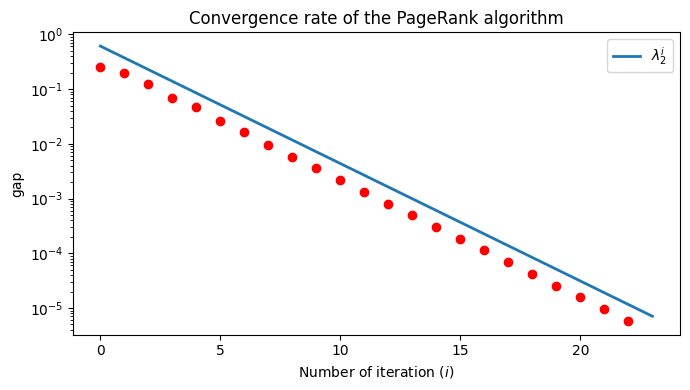

In [71]:
λ, _ = LA.eig(G)
λ_2 = np.sort(λ.real)[-2]
λ_gap = [λ_2 ** i for i in range(1,25)]

fig = plt.figure(figsize=(7,4))
plt.semilogy(gap, 'ro')
plt.semilogy(λ_gap, lw=2.0, label="$\lambda_2^i$")
plt.title("Convergence rate of the PageRank algorithm")
plt.xlabel("Number of iteration $(i)$")
plt.ylabel("gap")
plt.legend()
plt.tight_layout()
print(π)

# English 
## Integrate the previously built functions in order to finalize PageRank algorithm

Implement the function that integrates the different steps that make up the PageRank algorithm. You should use the functions you have already defined earlier to build the final algorithm.

#### Reminder of step need to build the PageRank algorithm
1. Normalization of the matrix of ajacence of the graph of the web
2. Find the "Dangling nodes" (the nodes that don't have any outgoing links)
3. Creation of the "Google" Matrix
4. Calculating the stationary state vector of the Markov chain $\mathbf{G}$

# Français
## Intégration des trois étapes qui constituent l'algorithme du PageRank

Construire la fonction qui intégre les différentes étapes qui constitutent l'algorithme du PageRank. Vous allez utiliser les fonctions que vous avez définies précedemment pour construire l'algorithme final. 

**Algorithme du PageRank**
1. Normalisation de la matrice d'ajacence du graphe du web
2. Découverte des noeuds du graphe du web ne possédant pas de liens de sortie "Dangling nodes"(aucun lien hypertext)
3. Creation de la "Google" Matrice 
4. Calcul de la vecteur des états stationnaires de la chaine de Markov $\mathbf{G}$ 


In [74]:
def pagerank(Graph, α=0.85, max_iter=100, tol=1e-6):
    """Return the PageRank of the nodes in the graph.

    PageRank computes a ranking of the nodes in the graph G based on
    the structure of the incoming links. It was originally designed as
    an algorithm to rank web pages.

    Parameters
    -----------
    G : graph
      A NetworkX graph.  Undirected graphs will be converted to a directed
      graph with two directed edges for each undirected edge.

    alpha : float, optional
      Damping parameter for PageRank, default=0.85.

    max_iter : integer, optional
      Maximum number of iterations in power method.

    tol : float, optional
      Error tolerance used to check convergence in power method solver.
      
    Return
    PR : dict
      retourne un dictionnaire avec comme clé le nodeid, et comme valeur le pagerank du noeud 
    """
    # MY CODE HERE
    PR={}
    n=len(Graph.nodes())
    H=transform_to_stochatic(Graph)
    a=dangling_vector(H)
    Google=google_matrix(H,a,α)
    vector,gap=power_iter(Google,max_iter,tol)
    for i in range(1,n+1):
        PR[i]=vector[i-1]
    return PR

In [75]:
PR = pagerank(g)

PR_res = dict({
    1: 0.05170556259095016, 
    2: 0.07368068204240269, 
    3: 0.057413363969125462, 
    4: 0.3487020460725242, 
    5: 0.1999034157779406, 
    6: 0.2685949295470571})

for k,v in PR_res.items():
    np.testing.assert_allclose(PR[k], PR_res[k], rtol=1e-5)

# English 
## Application of the PageRank: ranking wikipedia article
### Load the web graph of Wikipedia

# Français 
## Application de l'algorithme du PageRank pour le classement des pages web
### Exemple avec le graphe des liens du site Wikipedia

In [76]:
# load the wikipedia graph (networkx)
Gwikipedia = nx.read_graphml("../../data/Wikipedia/wikipedia.graphml", node_type=int)
#Gwikipedia = nx.read_gpickle("../../data/Wikipedia/wikipedia.gpickle")
#Gwikipedia = nx.read_edgelist("../../data/Wikipedia/wikipedia.edgelist", nodetype=int)

# load the metadat into a pandas dataframe
wikipedia_db = pd.read_pickle("../../data/Wikipedia/wikipedia.pkl")
# wikipedia_db = pd.read_csv("../../data/Wikipedia/wikipedia.csv", index_col="PageID")

wikipedia_db.head(n=100)

,Page Title,Page Title Encoded,Keywords
PageID,,,
1,Áedán_mac_Gabráin,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,"áedán, son, dál, mac, king, adomnán, battle, r..."
2,Åland,%C3%85land,"åland, islands, finland, finnish, swedish, n, ..."
3,Édouard_Manet,%C3%89douard_Manet,"manet, paris, painting, one, salon, le, painti..."
4,Éire,%C3%89ire,"ireland, irish, republic, state, éire, name, d..."
5,Óengus_I_of_the_Picts,%C3%93engus_I_of_the_Picts,"óengus, king, dál, son, mac, riata, nechtan, p..."
...,...,...,...
96,Able_Archer_83,Able_Archer_83,"soviet, nuclear, able, archer, attack, reagan,..."
97,Abraham_Goldfaden,Abraham_Goldfaden,"goldfaden, yiddish, theatre, jewish, first, di..."
98,Abraham_Lincoln,Abraham_Lincoln,"lincoln, war, states, union, abraham, illinois..."


# English 
##  Calculate statistical properties of the graph of wikipedia

Compute the following:
1. the graph density. Reminder, for a graph $\mathcal{G}(\mathcal{V}, \mathcal{E})$ the density $D =\vert \mathcal{E}\vert/N(N-1)$, 
2. the degree distribution of the node degree of the wikipedia graph
3. the complementary cummulative distribution of the node degree of the wikipedia graph

# Français
## Calcule des propriété statistique du graphe les liens des pages wikipedia 

Nous allons calculer:
1. la densité du graphe (rappel la densité d'un graphe $\mathcal{G}(\mathcal{V}, \mathcal{E})$ est $D =\vert \mathcal{E}\vert/N(N-1)$) 
2. la densité de probabilité empirique du degré des noeuds du graphe 
3. le complémentaire de la fonction de répartition empirique du degré des noeuds du graphe

In [77]:
#
# question 1
#

# MY CODE HERE
density=nx.density(Gwikipedia)

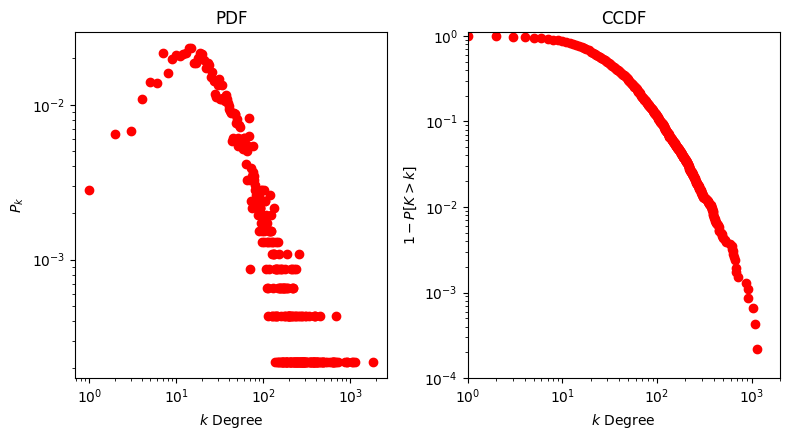

In [78]:
#
# question 2 & 3: Plot the degree distribution and the complementary cummulative degree distribution
#
degree = [v for k,v in dict(Gwikipedia.degree()).items()]
distribution = [(elem, degree.count(elem)) for elem in sorted(set(degree))]
k,pk = zip(*distribution)
PDF = np.array(pk)/sum(pk)
CCDF = 1-np.cumsum(PDF)


#
# Plots 
#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16/2,9/2))
ax1.loglog(k, PDF, 'ro')
ax1.set_xlabel("$k$ Degree")
ax1.set_ylabel("$P_k$")
ax1.set_title("PDF")

ax2.loglog(k, CCDF, 'ro')
ax2.set_ylim(1e-4,1.1)
ax2.set_xlim(1,2e3)
ax2.set_xlabel("$k$ Degree")
ax2.set_ylabel("$1-P[K > k]$")
ax2.set_title("CCDF")
fig.tight_layout()

# English 
## Questions

- Is the wikipedia graph dense ? or sparce ?
- What is to say about the degree distribution of the wikipedia graph

# Français
## Questions

- La matrice d'adjacence du graphe est-elle dense ? ou au contraire creuse ?
      La matrice d’adjacence de Wikipedia est creuse 
- Que dire de la distribution du degrée des articles wikipedia ?
      La matrice d’adjacence de Wikipedia est creuse 

# English 
## Compute the PageRank of a subset of the wikipedia articles

# Français
## Calculer le PageRank du graphe des articles  Wikipedia

In [79]:
# compute the pagerank with your previously defined functions

# MY CODE HERE
PR=pagerank(Gwikipedia)

PR = [[k,v] for k,v in PR.items()]
PR = pd.DataFrame(PR, columns=['PageID', 'PageRank'])
PR = PR.set_index('PageID')
PR.head(100)

,PageRank
PageID,
1,0.000033
2,0.000033
3,0.000033
4,0.000033
5,0.000033
...,...
96,0.000041
97,0.000033
98,0.000411


In [80]:
#  We assign a PageRank to each Wikipedia article 
wikipedia_db = wikipedia_db.join(PR)
# We sort the wikipedia article acording to their PageRank
wikipedia_db = wikipedia_db.sort_values(['PageRank'], ascending=0)
# we print the top ranked wikipedia article 
wikipedia_db[["Page Title", "PageRank"]].head()

,Page Title,PageRank
PageID,,
4298,United_States,0.009562
1569,France,0.006420
1434,Europe,0.006337
4294,United_Kingdom,0.006232
1390,English_language,0.004863


In [81]:
wikipedia_db.head()

,Page Title,Page Title Encoded,Keywords,PageRank
PageID,,,,
4298,United_States,United_States,"states, united, american, u, world, war, new, ...",0.009562
1569,France,France,"france, french, population, republic, european...",0.006420
1434,Europe,Europe,"europe, european, languages, countries, sea, r...",0.006337
4294,United_Kingdom,United_Kingdom,"united, kingdom, uk, england, british, scotlan...",0.006232
1390,English_language,English_language,"english, language, words, speakers, used, vowe...",0.004863


# English
## Search Wikipedia article with to keywords

**Warning**: the number of wikipedia pages indexed in this database is of the order of 5000 articles only, written in English. The number of articles and therefore of keywords are therefore limited. Perform queries with keywords written in lowercase letters only.

# Français
## Effectuer une recherche par mots clés sur la base de données des articles Wikipedia

**Attention**: le nombre de pages wikipedia indexées dans cette base de données est de l'ordre de 5000 articles seulement, rédigé en anglais. Le nombre d'articles et donc de mots clées sont donc restreints. Effectuer les requêtes avec des mots clés ecrit en lettres minuscules uniquements.

In [82]:
# Keyworkds
mot_clee_1 = "france"
mot_clee_2 = "germany"
# Request
wikipedia_db[(wikipedia_db['Keywords'].str.contains(mot_clee_1)==True) & (wikipedia_db['Keywords'].str.contains(mot_clee_2)==True)].head(10)

,Page Title,Page Title Encoded,Keywords,PageRank
PageID,,,,
4197,Treaty_of_Versailles,Treaty_of_Versailles,"germany, treaty, france, war, german, reparati...",0.000388
151,Airbus,Airbus,"airbus, aircraft, boeing, eads, bae, engine, f...",0.000198
3114,Otto_von_Bismarck,Otto_von_Bismarck,"bismarck, german, wilhelm, prussia, germany, v...",0.000089
1481,Fed_Cup,Fed_Cup,"united, states, australia, spain, germany, fra...",0.000041


In [83]:
# Keywords
mot_clee_1 = "france"
# Requete
wikipedia_db[(wikipedia_db['Keywords'].str.contains(mot_clee_1)==True) ].head(10)

,Page Title,Page Title Encoded,Keywords,PageRank
PageID,,,,
1569,France,France,"france, french, population, republic, european...",0.006420
3160,Paris,Paris,"paris, city, de, france, century, many, area, ...",0.002227
2918,Napoleon_I_of_France,Napoleon_I_of_France,"napoleon, french, bonaparte, france, army, bri...",0.000981
18,17th_century,17th_century,"bc, england, english, dutch, france, french, c...",0.000978
1596,French_Revolution,French_Revolution,"assembly, king, france, french, new, louis, na...",0.000846
4253,Tunisia,Tunisia,"tunisia, century, tunisian, government, french...",0.000718
4540,World_Heritage_Site,World_Heritage_Site,"site, december, flag, world, heritage, france,...",0.000673
1388,English_Channel,English_Channel,"channel, first, english, dover, crossings, swi...",0.000530
2919,Napoleonic_Wars,Napoleonic_Wars,"french, napoleon, army, war, france, kingdom, ...",0.000504


# English 
## Questions

Carry out jointly: a query on the database and with the google search engines:

* Make a google Request "site: wikipedia.org keyword1 keyword2"
* Qualitatively compare the requests made on Google and those made on the database

# Français
## Question

Effectuez conjointement: une requête sur la base de donnée et avec le moteurs de recherche de google: 

* Faite une Requete google "site:wikipedia.org mot_clée1 mot_clée2"
* Comparer qualitativement les requetes faite sur Google et celles effectués sur la base de données
'''
	1.	Recherche Google (site:wikipedia.org mot_clé1 mot_clé2):Les résultats sont triés en fonction de la pertinence et de l’autorité.il est rapide, intuitif, avec des résumés et des liens associés,mais impossible de réaliser des requêtes structurées (comme filtrer par catégorie, date, etc.).
	2.	Requête dans la base de données Wikipedia:Permet de faire des recherches précises et des analyses structurées avec SQL ou Pandas.il est possible de filtrer par catégorie, nombre de vues, date de création, etc.
'''

# English
## Distributed PageRank

The ranking of web pages through the "PageRank" algorithm is still considered to be the biggest matrix problem known to date. To give you an order of magnitude, in 2007 the "power iteration" which allowed the calculation of PageRank at Google occupied a data center for 15 days to finalize the calculation. In order to reduce the complexity of the computation $\pi^T \mathbf{G}$ we would like to perform a computation on a sparse matrix instead of the dense matrix $\mathbf{G}$. At the same time, one wishes to be able to parallelize computation (multiprocessor, cluster of computation). An elegant way to obtain these two properties is to perform the following operation on all the nodes of the graph (Cf. eq. 7., Fig. 5, Algo. 3):
<br>
(**eq. 7**)
$$ PR_{i} = \frac{(1-\alpha)}{n} + \alpha \sum_{j \in \mathcal{N}^{-}(i)} \frac{PR_j}{L_j}$$
<br>
<br>
<div align="center">
<img src="../../images/PageRankDistributed2.png" width="400px"></img>
<br />
<div align="center"><b>Fig. 5</b>: PageRank</div>
</div>

The operation described in equation 7. can be computed independently (in parallel) for all the nodes of the graph. This is the approach that is developed in software for calculating large volumes of data such as: 

* [Spark/Graphx](http://spark.apache.org/)

or more simply with certain graphs' libraries of parallel computation:

* [boost graph](http://www.boost.org/doc/libs/1_46_0/libs/graph_parallel/doc/html/page_rank.html)
* [graph-tool](https://graph-tool.skewed.de/)
<br>
<br>
<div align="center">
<img src="../../images/PageRankDistributed.png" width="500px"></img>
<br />
<div align="center"><b>Alg 3</b>: PageRank distributed</div>
</div>

# Français
## Implémentation du PageRank avec un algorithme distribué


Le classement des page web au travers de l'algorithme du "PageRank" est encore aujourd'hui considéré comme étant le plus gros problème matriciel connu a ce jour. Pour vous donner un ordre de grandeur, en 2007 la "power iteration" qui permetait le calcul du PageRank chez Google occupait un datacenter pendant 15 jours pour finaliser le calcul. Afin de reduire la complexité du calcul $\pi^T \mathbf{G}$ on souhaiterait effectuer un calcul sur une matrice creuse à la place de la matrice $\mathbf{G}$ qui est dense. Dans le même temps, on souhaite pouvoir paralléliser le calcul (multiprocesseur, cluster de calcul). Une manière élégante d'obtenir ces deux propriétés est d'éffectuer l'opération suivante sur tout les noeuds du graphe (Cf. eq. 7., Fig. 5, Algo. 3):
<br>
(**eq. 7**)
$$ PR_{i} = \frac{(1-\alpha)}{n} + \alpha \sum_{j \in \mathcal{N}(i)} \frac{PR_j}{L_j}$$
<br>
<br>
<div align="center">
<img src="../../images/PageRankDistributed2.png" width="400px"></img>
<b>Figure 5.</b>: PageRank 
</div>

L'opération decrite dans l'equation 7. peut être calculer de manière indépendante (en parallèle) pour tous les noeuds du graphes. C'est l'approche qui est développée dans des logiciels pour de calcul de grands volumes de données tels que: 

* [Spark/Graphx](http://spark.apache.org/)
* [Rapids](https://rapids.ai/)

ou plus simplement dans certaines librairies de calcul parallèle utilisant la thèorie des graphes:

* [boost graph](http://www.boost.org/doc/libs/1_46_0/libs/graph_parallel/doc/html/page_rank.html)
* [graph-tool](https://graph-tool.skewed.de/)
<br>
<br>
<div align="center">
<img src="../../images/PageRankDistributed.png" width="500px"></img>
<b>Algo 3.</b>: Algorithme simplifié du PageRank
</div>

In [92]:
def pagerank_distributed(g, α=0.9, max_iter=200, tol=1.0e-6):
    N = g.number_of_nodes()
    gc = g.copy()
    
    # we add the dangling nodes  
    for dangling in g.nodes():
        if gc.out_degree(dangling) == 0:
            for n in g.nodes():
                gc.add_edge(dangling, n)

    # we initializa the pagerank for each node of the graph
    for v in gc.nodes():
        gc.nodes[v]['PageRankOld'] = 1.0/N
    
    # Power iteration
    for i in range(max_iter):
        # MY CODE HERE
        err=0.0
        for n in gc.nodes():
            gc.nodes[n]['PageRank']=(1-α)/N+α*sum(gc.nodes[k]['PageRankOld']/gc.out_degree(k) for k in gc.predecessors(n))
        err= np.linalg.norm([gc.nodes[n]['PageRank'] - gc.nodes[n]['PageRankOld'] for n in gc.nodes()],ord=1)
        for u in gc.nodes():
            gc.nodes[u]['PageRankOld'] =gc.nodes[u]['PageRank']
        if err < N * tol:
            return {n:gc.nodes[n]['PageRank'] for n in gc.nodes()}
        
    raise RuntimeError('pagerank: power iteration failed to converge in %d iterations.' % max_iter)

In [93]:
%%timeit

g = nx.DiGraph()
g.add_nodes_from([1, 2, 3, 4, 5, 6])
g.add_edge(1, 2)
g.add_edge(3, 1)
g.add_edge(1, 3)
g.add_edge(3, 2)
g.add_edge(3, 5)
g.add_edge(5, 6)
g.add_edge(5, 4)
g.add_edge(4, 5)
g.add_edge(4, 6)
g.add_edge(6, 4)

PR_dist = pagerank_distributed(g)
print(PR_dist)

PR_res = dict({
    1: 0.0372119873811025, 
    2: 0.05395738811699192, 
    3: 0.04150567933532273, 
    4: 0.37508077029418346, 
    5: 0.20599832111968525, 
    6: 0.28624585375271416})

for k,v in PR_res.items():
    np.testing.assert_allclose(PR_dist[k], PR_res[k], rtol=1e-4)

{1: 0.03721312715805475, 2: 0.0539593685979186, 3: 0.04150700697389664, 4: 0.37507848151115425, 5: 0.20599776987949375, 6: 0.2862442458794821}
{1: 0.03721312715805475, 2: 0.0539593685979186, 3: 0.04150700697389664, 4: 0.37507848151115425, 5: 0.20599776987949375, 6: 0.2862442458794821}
{1: 0.03721312715805475, 2: 0.0539593685979186, 3: 0.04150700697389664, 4: 0.37507848151115425, 5: 0.20599776987949375, 6: 0.2862442458794821}
{1: 0.03721312715805475, 2: 0.0539593685979186, 3: 0.04150700697389664, 4: 0.37507848151115425, 5: 0.20599776987949375, 6: 0.2862442458794821}
{1: 0.03721312715805475, 2: 0.0539593685979186, 3: 0.04150700697389664, 4: 0.37507848151115425, 5: 0.20599776987949375, 6: 0.2862442458794821}
{1: 0.03721312715805475, 2: 0.0539593685979186, 3: 0.04150700697389664, 4: 0.37507848151115425, 5: 0.20599776987949375, 6: 0.2862442458794821}
{1: 0.03721312715805475, 2: 0.0539593685979186, 3: 0.04150700697389664, 4: 0.37507848151115425, 5: 0.20599776987949375, 6: 0.2862442458794821}

## Benchmark the two PageRank alogrithms 

1. Measure the computation time of both algorithms (the distributed one vs the standard algorithm)
2. Your measurement sould be the average of at least 30 trials
3. Use the Wikipedia Graph to perform your tests

In [134]:
import time 
from tqdm import tqdm
n_trial = 30

# MY CODE HERE
r=0.90
def time_pr(n_trial,r):
    times=[]
    for i in range(n_trial):
        start_time=time.time()
        pagerank(Gwikipedia,r)
        end_time=time.time()
        times.append(end_time-start_time)
    return times
def time_prd(n_trial,r):
    times=[]
    for i in range(n_trial):
        start_time=time.time()
        pagerank_distributed(Gwikipedia,r)
        end_time=time.time()
        times.append(end_time-start_time)
    return times
    
mean_elapsed_time_pr=time_pr(n_trial,r)
mean_elapsed_time_prd=time_prd(n_trial,r)

## Plot the result of your measurement

1. Plot the running time of both algorithms 

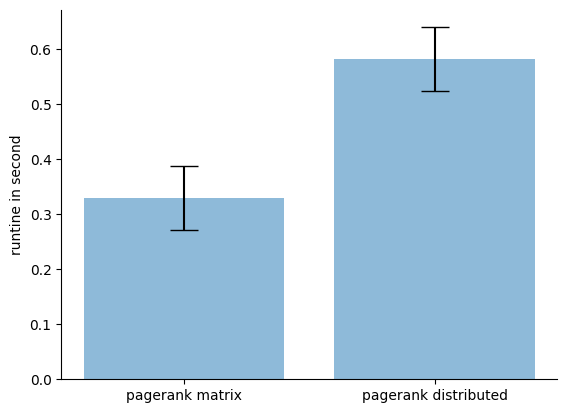

In [124]:
fig, ax = plt.subplots()

leg = ["pagerank matrix", "pagerank distributed"]
err = [np.std(mean_elapsed_time_pr), np.std(mean_elapsed_time_prd)]
PR_runtime = [np.mean(mean_elapsed_time_pr), np.mean(mean_elapsed_time_prd)]
ax.bar(leg, PR_runtime, yerr=err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel("runtine in second")
ax.spines[['right', 'top']].set_visible(False)
plt.show()

## Bechmarking the PageRank algorithm for different alpha

Using the distributed Pagerank measure the running time of the algorithm for different $\alpha$
* For $\alpha = [0.99, 0.95, 0.9, 0.85]$
* The benchmark foreach $\alpha$ should be an average over 30 runs
* Use the Wikipedia Graph to perform your tests

In [135]:
n_trial = 30
# MY CODE HERE
mean_elapsed_time_99=time_prd(n_trial,0.99)
mean_elapsed_time_95=time_prd(n_trial,0.95)
mean_elapsed_time_90=time_prd(n_trial,0.90)
mean_elapsed_time_85=time_prd(n_trial,0.85)

## Plot the running time of Pagerank for each $\alpha$ and conclude about the effect of $\alpha$ on the performance of the Pagerank algorithm

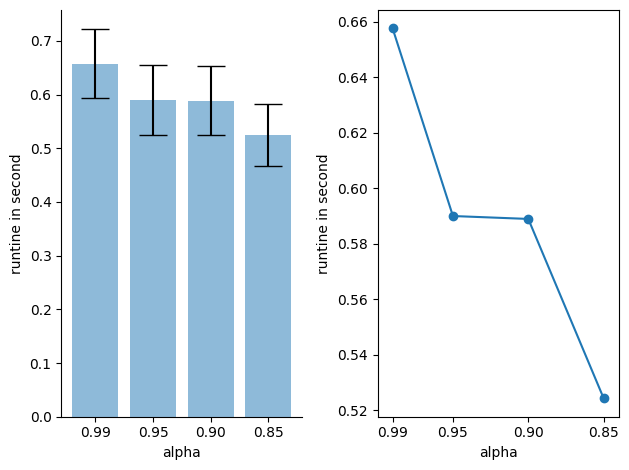

In [137]:
fig, (ax1,ax2) = plt.subplots(1,2)

leg = ["0.99", "0.95", "0.90", "0.85"]
err = [np.std(mean_elapsed_time_99), np.std(mean_elapsed_time_95), np.std(mean_elapsed_time_90), np.std(mean_elapsed_time_85)]

PR_runtime = [np.mean(mean_elapsed_time_99), np.mean(mean_elapsed_time_95), np.mean(mean_elapsed_time_90), np.mean(mean_elapsed_time_85)]
ax1.bar(leg, PR_runtime, yerr=err, align='center', alpha=0.5, ecolor='black', capsize=10)
ax1.set_ylabel("runtine in second")
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_xlabel("alpha")

leg = [0.99, 0.95, 0.90, 0.85]
PR_runtime = [np.mean(mean_elapsed_time_99), np.mean(mean_elapsed_time_95), np.mean(mean_elapsed_time_90), np.mean(mean_elapsed_time_85)]
ax2.plot(leg, PR_runtime, "o-")
ax2.set_xlim(1, 0.84)
ax2.set_xticks(leg)
ax2.set_xlabel("alpha")
ax2.set_ylabel("runtine in second")

plt.tight_layout()
plt.show()

## References

[1] Amy N. Langville, Carl D. Meyer, "[Deeper Inside PageRank](http://projecteuclid.org/euclid.im/1109190965)", Internet Math., Vol. 1(3), pp. 335--380, 2003.

[2] Jon Kleinberg, "[Authoritative sources in a hyperlinked environment](http://www.cs.cornell.edu/home/kleinber/auth.pdf)",  Journal of the ACM, 46(5), pp. 604–632, 1999.

[3] L. Page, S. Brin, R. Motwani, T. Winograd, "[The PageRank citation ranking: Bringing order to the Web](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf)", published as a technical report on January 29, 1998.